In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainds = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\Train_UWu5bXk.txt")
testds = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\Test_u94Q5KV.txt")
subds = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\SampleSubmission_TmnO39y.txt")

In [3]:
trainds.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
testds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
subds.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [6]:
trainds['type'] = 'train'

In [7]:
testds['type'] = 'test'

In [8]:
trainds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
testds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [10]:
combineds = pd.concat([trainds, testds], axis='index', ignore_index = True)

In [11]:
combineds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
combineds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  type                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [13]:
combineds.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [14]:
combineds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
num_cols = combineds.select_dtypes(include = np.number).drop(columns='Item_Outlet_Sales').columns

In [16]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [17]:
cat_cols = combineds.select_dtypes(exclude=np.number).columns

In [18]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'type'],
      dtype='object')

In [19]:
combineds[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
type                       2
dtype: int64

In [20]:
combineds[cat_cols].apply(lambda x: print(x.value_counts()))

FDU52    10
FDH10    10
FDB35    10
FDP39    10
FDE36    10
         ..
FDL50     7
FDM10     7
NCW54     7
FDX49     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
type                    None
dtype: object

In [21]:
combineds.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [22]:
combineds.groupby(combineds['Item_Identifier'].str.slice(0,2)).Item_Fat_Content.value_counts().head(50)

Item_Identifier  Item_Fat_Content
DR               Low Fat             1115
                 Regular              105
                 LF                    62
                 low fat               31
                 reg                    4
FD               Low Fat             4883
                 Regular             4719
                 LF                   305
                 reg                  191
                 low fat              103
NC               Low Fat             2487
                 LF                   155
                 low fat               44
Name: Item_Fat_Content, dtype: int64

In [23]:
combineds.groupby(combineds['Item_Identifier'].str.slice(0,2)).Item_Type.value_counts().head(50)

Item_Identifier  Item_Type            
DR               Soft Drinks               726
                 Hard Drinks               362
                 Dairy                     229
FD               Fruits and Vegetables    2013
                 Snack Foods              1989
                 Frozen Foods             1426
                 Baking Goods             1086
                 Canned                   1084
                 Dairy                     907
                 Meat                      736
                 Breads                    416
                 Starchy Foods             269
                 Breakfast                 186
                 Seafood                    89
NC               Household                1548
                 Health and Hygiene        858
                 Others                    280
Name: Item_Type, dtype: int64

In [24]:
combineds[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
type                       0
dtype: int64

In [25]:
combineds[combineds['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [26]:
combineds['Outlet_Size'].isna()

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [27]:
## Outlet size based on Outlet_Identifier

In [28]:
combineds.groupby(combineds['Outlet_Identifier']).Outlet_Size.value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             NaN             925
OUT013             High           1553
OUT017             NaN            1543
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT045             NaN            1548
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [29]:
combineds[num_cols].isna().sum()

Item_Weight                  2439
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [30]:
combineds[combineds['Item_Weight'].isna()].sort_values(by='Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
12435,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040,train
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604,train
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112,train
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,NCZ42,NaN,Low Fat,0.019764,Household,236.3248,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test
11157,NCZ42,NaN,Low Fat,0.011233,Household,235.5248,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
2084,NCZ53,NaN,Low Fat,0.024359,Health and Hygiene,190.4214,OUT027,1985,Medium,Tier 3,Supermarket Type3,5652.6420,train
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768,train


In [31]:
combineds.groupby(combineds['Item_Identifier']).Item_Weight.mean().head(60)

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
DRE15    13.350
DRE25    15.350
DRE27    11.850
DRE37    13.500
DRE48     8.430
DRE49    20.750
DRE60     9.395
DRF01     5.655
DRF03    19.100
DRF13    12.100
DRF15    18.350
DRF23     4.610
DRF25     9.000
DRF27     8.930
DRF36    16.100
DRF37    17.250
DRF48     5.730
DRF49     7.270
DRF51    15.750
DRF60    10.800
DRG01    14.800
DRG03    14.500
DRG11     6.385
DRG13    17.250
DRG15     6.130
DRG23     8.880
DRG25    10.500
DRG27     8.895
DRG36    14.150
DRG37    16.200
Name: Item_Weight, dtype

In [32]:
combineds[['Item_Weight']].describe()

,Item_Weight
count,11765.000000
mean,12.792854
std,4.652502
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


In [33]:
combineds.groupby(combineds['Item_Identifier']).Item_Weight.median().head(50)

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
DRE15    13.350
DRE25    15.350
DRE27    11.850
DRE37    13.500
DRE48     8.430
DRE49    20.750
DRE60     9.395
DRF01     5.655
DRF03    19.100
DRF13    12.100
DRF15    18.350
DRF23     4.610
DRF25     9.000
DRF27     8.930
DRF36    16.100
DRF37    17.250
DRF48     5.730
DRF49     7.270
DRF51    15.750
DRF60    10.800
Name: Item_Weight, dtype: float64

In [34]:
combineds["Item_Weight"] = combineds.groupby(combineds['Item_Identifier']).Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [35]:
combineds.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [36]:
combineds[combineds["Item_Identifier"] == "DRA24"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076,train
2879,DRA24,19.35,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604,train
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736,train
4416,DRA24,19.35,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040,train
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228,train
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208,train
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436,train
9734,DRA24,19.35,Regular,0.040009,Soft Drinks,163.2868,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
11370,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
13061,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test


In [37]:
combineds[combineds["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type


In [38]:
combineds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [39]:
combineds['Outlet_Size'].value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [40]:
combineds['Outlet_Identifier'][combineds['Outlet_Size'].isna()].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [41]:
combineds[combineds['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [42]:
from scipy.stats import mode

In [43]:
combineds.pivot_table

<bound method DataFrame.pivot_table of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.80

In [44]:
combineds.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT013,High
OUT017,0
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,0
OUT046,Small


In [45]:
combineds.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: mode(x)))

,Outlet_Size
Outlet_Type,
Grocery Store,"([Small], [880])"
Supermarket Type1,"([Small], [3100])"
Supermarket Type2,"([Medium], [1546])"
Supermarket Type3,"([Medium], [1559])"


In [46]:
combineds[ (combineds['Outlet_Size'] != np.NaN)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [47]:
combineds[['Outlet_Identifier', 'Outlet_Type']][combineds['Outlet_Identifier']=='OUT010']

,Outlet_Identifier,Outlet_Type
3,OUT010,Grocery Store
28,OUT010,Grocery Store
30,OUT010,Grocery Store
45,OUT010,Grocery Store
65,OUT010,Grocery Store
...,...,...
14094,OUT010,Grocery Store
14095,OUT010,Grocery Store
14103,OUT010,Grocery Store
14173,OUT010,Grocery Store


In [48]:
combineds[['Outlet_Identifier', 'Outlet_Type']][combineds['Outlet_Identifier']=='OUT017']

,Outlet_Identifier,Outlet_Type
9,OUT017,Supermarket Type1
25,OUT017,Supermarket Type1
53,OUT017,Supermarket Type1
54,OUT017,Supermarket Type1
73,OUT017,Supermarket Type1
...,...,...
14147,OUT017,Supermarket Type1
14162,OUT017,Supermarket Type1
14185,OUT017,Supermarket Type1
14193,OUT017,Supermarket Type1


In [49]:
combineds[['Outlet_Identifier', 'Outlet_Type']][combineds['Outlet_Identifier']=='OUT045']

,Outlet_Identifier,Outlet_Type
8,OUT045,Supermarket Type1
33,OUT045,Supermarket Type1
46,OUT045,Supermarket Type1
47,OUT045,Supermarket Type1
56,OUT045,Supermarket Type1
...,...,...
14170,OUT045,Supermarket Type1
14172,OUT045,Supermarket Type1
14175,OUT045,Supermarket Type1
14201,OUT045,Supermarket Type1


In [50]:
combineds["Outlet_Size"] = combineds["Outlet_Size"].fillna("unknown")

In [51]:
combineds["Outlet_Size"] = combineds["Outlet_Size"].replace({"unknown":"Small"})

In [52]:
combineds["Outlet_Size"].isna().sum()

0

In [53]:
combineds.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train


In [54]:
combineds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [55]:
combineds['Item_Identifier'][combineds['Item_Visibility'] == 0].unique

<bound method Series.unique of 3        FDX07
4        NCD19
5        FDP36
10       FDY07
32       FDP33
         ...  
14166    FDQ19
14171    FDK26
14177    FDQ57
14184    DRG37
14202    FDJ26
Name: Item_Identifier, Length: 879, dtype: object>

In [56]:
combineds['Item_Visibility'][combineds['Item_Identifier'] == 'FDP36'].mean()

0.057058688875

In [57]:
combineds['Item_Visibility'][combineds['Item_Identifier'] == 'FDP36'].median()

0.09112584700000001

In [58]:
combineds["Item_Visibility"] = combineds["Item_Visibility"].replace({0:np.NAN})

In [59]:
combineds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [60]:
combineds['Item_Visibility'][combineds['Item_Identifier'] == 'FDP36'].mean()

0.0912939022

In [61]:
combineds['Item_Visibility'][combineds['Item_Identifier'] == 'FDP36'].median()

0.09117240300000001

In [62]:
combineds[combineds['Item_Identifier'] == 'FDP36']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
5,FDP36,10.395,Regular,NaN,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
1912,FDP36,10.395,Regular,0.091688,Baking Goods,49.0008,OUT017,2007,Small,Tier 2,Supermarket Type1,860.2136,train
5685,FDP36,10.395,Regular,0.091097,Baking Goods,52.3008,OUT013,1987,High,Tier 3,Supermarket Type1,2226.4352,train
9975,FDP36,10.395,Regular,0.091172,Baking Goods,48.6008,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
11228,FDP36,10.395,Regular,NaN,Baking Goods,49.6008,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
12303,FDP36,10.395,Regular,0.091155,Baking Goods,52.2008,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,test
12400,FDP36,10.395,Regular,0.091357,Baking Goods,50.1008,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test
12649,FDP36,10.395,Regular,NaN,Baking Goods,51.9008,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [63]:
combineds['Item_Visibility'] = combineds.groupby('Item_Identifier').Item_Visibility.transform(lambda x: x.fillna(x.median()))

In [64]:
combineds[combineds['Item_Identifier'] == 'FDP36']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
5,FDP36,10.395,Regular,0.091172,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
1912,FDP36,10.395,Regular,0.091688,Baking Goods,49.0008,OUT017,2007,Small,Tier 2,Supermarket Type1,860.2136,train
5685,FDP36,10.395,Regular,0.091097,Baking Goods,52.3008,OUT013,1987,High,Tier 3,Supermarket Type1,2226.4352,train
9975,FDP36,10.395,Regular,0.091172,Baking Goods,48.6008,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
11228,FDP36,10.395,Regular,0.091172,Baking Goods,49.6008,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
12303,FDP36,10.395,Regular,0.091155,Baking Goods,52.2008,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,test
12400,FDP36,10.395,Regular,0.091357,Baking Goods,50.1008,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test
12649,FDP36,10.395,Regular,0.091172,Baking Goods,51.9008,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [65]:
combineds.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.091172,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train


In [66]:
combineds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [67]:
combineds["Outlet_Age"] = 2021 - combineds["Outlet_Establishment_Year"]

In [68]:
combineds.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,FDX07,19.20,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,23
4,NCD19,8.93,Low Fat,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,34


In [69]:
del combineds["Outlet_Establishment_Year"]

In [70]:
combineds.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,FDX07,19.20,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,23
4,NCD19,8.93,Low Fat,0.013206,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,34


### Data Preprocessing

In [72]:
combineds.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12


In [88]:
num_cols = combineds.select_dtypes(np.number).columns

In [92]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

<AxesSubplot:>

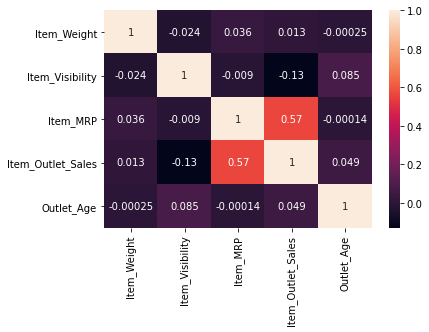

In [89]:
sns.heatmap(combineds[num_cols].corr(),annot=True)

In [119]:
num_cols = combineds.select_dtypes(np.number).drop(columns='Item_Outlet_Sales').columns

In [120]:
cat_cols = combineds.select_dtypes(exclude = np.number).drop(columns='type').columns

In [121]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [122]:
combineds[cat_cols]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1
14202,FDJ26,Regular,Canned,OUT017,Small,Tier 2,Supermarket Type1


In [123]:
pp_cat_data_cols = pd.get_dummies(combineds[cat_cols])

In [124]:
pp_cat_data_cols

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
14200,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14201,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
14202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [125]:
scaler = StandardScaler()

In [126]:
pp_num_data_cols = pd.DataFrame(scaler.fit_transform(combineds[num_cols]), columns=num_cols)

In [127]:
pp_num_data_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.751014,-1.084126,1.752511,-0.139681
1,-1.477653,-1.019297,-1.493696,-1.334228
2,1.011839,-1.069824,0.009874,-0.139681
3,1.377308,-0.946247,0.661838,-0.020226
4,-0.830557,-1.141133,-1.403623,1.293777
...,...,...,...,...
14199,-0.493036,-1.135309,0.005000,0.099229
14200,-1.116483,1.463037,0.453249,-1.334228
14201,-0.600527,0.069253,-0.358558,-0.498045
14202,0.538878,0.297364,1.185747,-1.095319


In [138]:
final_pp = pd.concat([pp_cat_data_cols, pp_num_data_cols, combineds[['Item_Outlet_Sales', 'type']]], axis='columns')

In [139]:
final_pp

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,type
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.751014,-1.084126,1.752511,-0.139681,3735.1380,train
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,-1.477653,-1.019297,-1.493696,-1.334228,443.4228,train
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.011839,-1.069824,0.009874,-0.139681,2097.2700,train
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1.377308,-0.946247,0.661838,-0.020226,732.3800,train
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.830557,-1.141133,-1.403623,1.293777,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.493036,-1.135309,0.005000,0.099229,NaN,test
14200,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-1.116483,1.463037,0.453249,-1.334228,NaN,test
14201,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.600527,0.069253,-0.358558,-0.498045,NaN,test
14202,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.538878,0.297364,1.185747,-1.095319,NaN,test


In [153]:
pp_train = final_pp[final_pp['type'] == 'train'].drop(columns = ["type"])

In [154]:
pp_train.head(2)

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.751014,-1.084126,1.752511,-0.139681,3735.1380
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,-1.477653,-1.019297,-1.493696,-1.334228,443.4228


In [155]:
pp_test = final_pp[final_pp['type'] == 'test'].drop(columns = ["type","Item_Outlet_Sales"])

In [156]:
pp_test.head(2)

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
8523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.710530,-1.254329,-0.533831,-0.139681
8524,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.965996,-0.635057,-0.864708,-1.095319


In [157]:
pp_train.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\PP_Train.csv")

In [158]:
pp_test.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\PP_Test.csv")

### Building a model

In [152]:
model = LinearRegression()

In [159]:
X = pp_train.drop(columns='Item_Outlet_Sales')

In [160]:
y = pp_train['Item_Outlet_Sales']

In [161]:
model.fit(X,y)

LinearRegression()

In [162]:
model.coef_

array([-7.87445245e+14, -2.71575358e+14, -4.40808908e+14, ...,
       -5.25625000e+01, -1.65000000e+01, -4.01555278e+14])

In [163]:
model.intercept_

-3.169051884146529e+16

In [164]:
y_pred = model.predict(X)

In [165]:
y_pred

array([5384.,  600., 1880., ..., 1188., 1712., 1480.])

In [167]:
mean_squared_error(y, y_pred, squared=False)

1027.304882252535

In [168]:
X_test = pp_test

In [169]:
y_t_pred = model.predict(X_test)

In [170]:
y_t_pred

array([1780., 1544., 2628., ..., 2040., 2632., 1736.])

In [172]:
subds["Item_Outlet_Sales"] = y_t_pred

In [173]:
subds

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1780.0
1,FDW14,OUT017,1544.0
2,NCN55,OUT010,2628.0
3,FDQ58,OUT017,2068.0
4,FDY38,OUT027,5156.0
...,...,...,...
5676,FDB58,OUT046,2720.0
5677,FDD47,OUT018,3100.0
5678,NCO17,OUT045,2040.0
5679,FDJ26,OUT017,2632.0


In [179]:
subds[subds['Item_Outlet_Sales'] < 0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1124.0
46,FDR14,OUT010,-1148.0
104,DRB01,OUT019,-880.0
112,FDO38,OUT010,-1004.0
133,FDY59,OUT010,-992.0
...,...,...,...
5478,FDV14,OUT019,-1004.0
5514,DRJ25,OUT010,-860.0
5572,NCH43,OUT010,-28.0
5580,FDA23,OUT010,-244.0


In [180]:
subds['Item_Outlet_Sales'] = np.abs(subds['Item_Outlet_Sales'])

In [181]:
subds[subds['Item_Outlet_Sales'] < 0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [182]:
subds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\final_submission.csv", index = False)

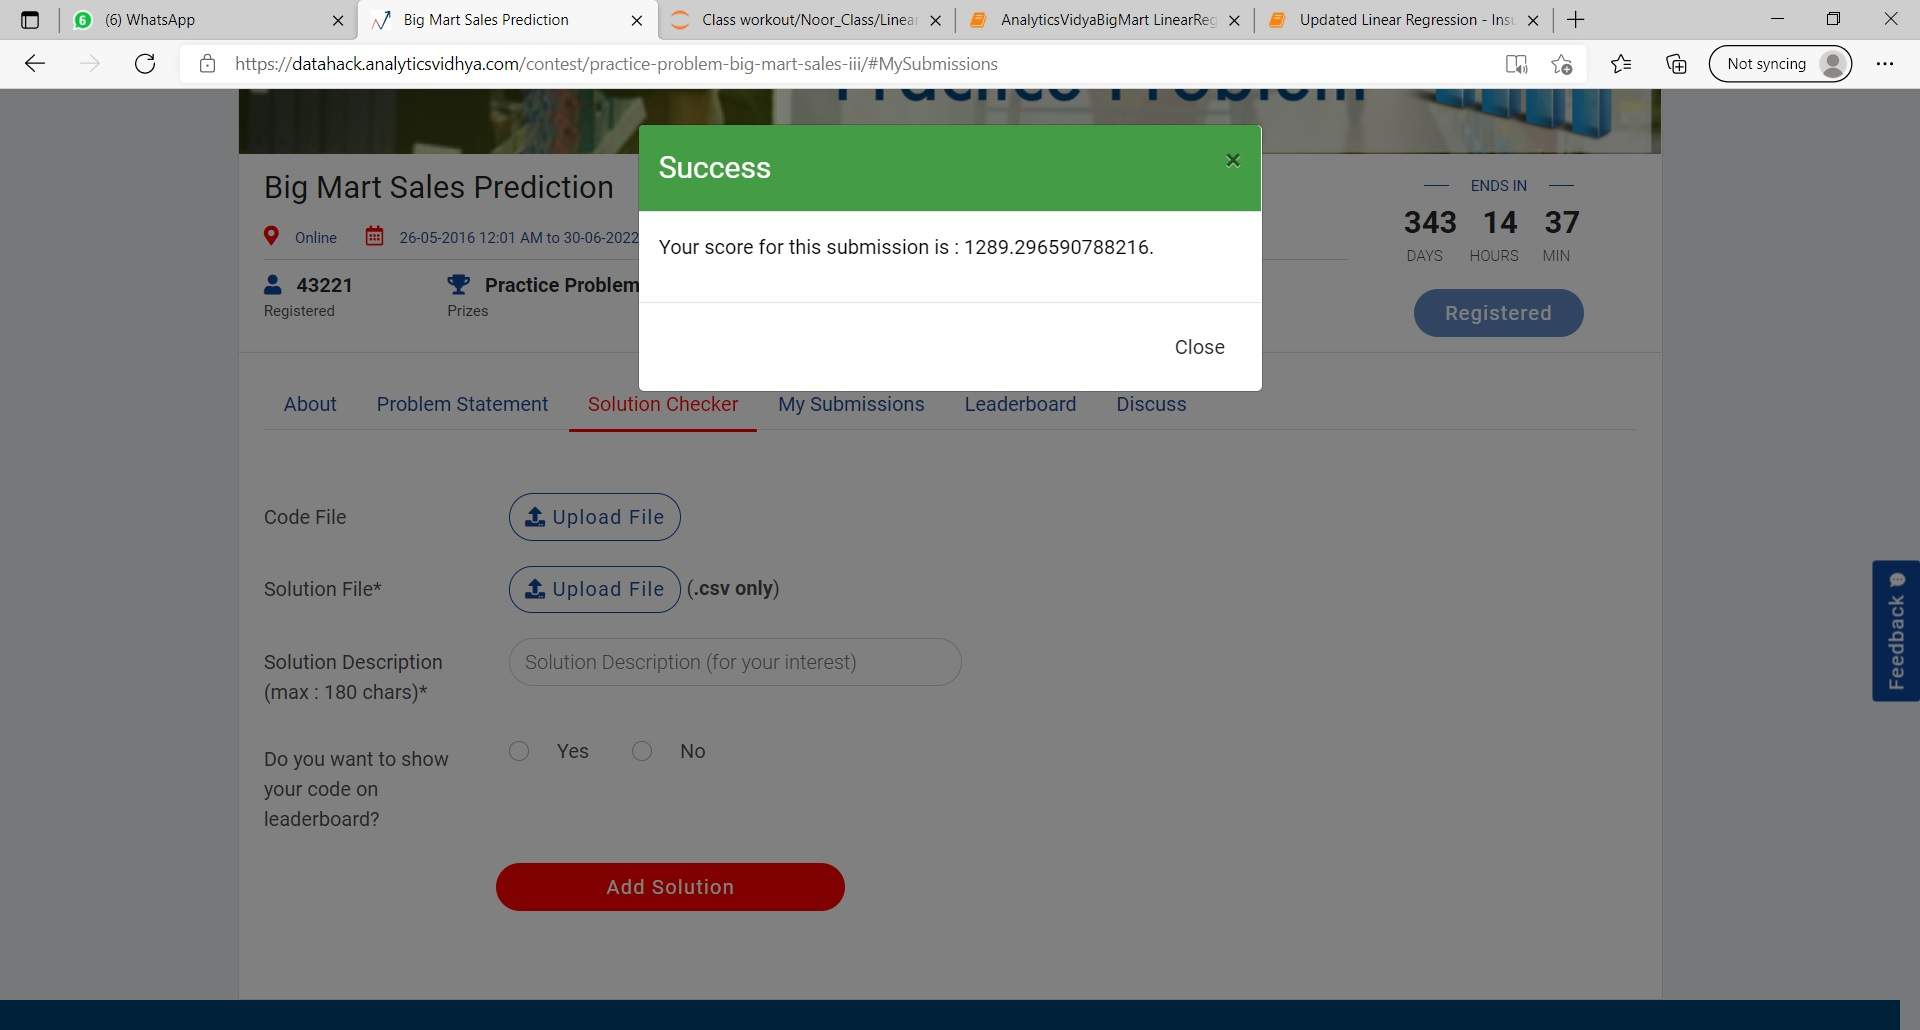

In [183]:
from IPython.display import Image
Image(filename=r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\06. Linear Regression - Hackathon Sample-20210719T031042Z-001\06. Linear Regression - Hackathon Sample\AnalyticsVidyaBigMart LinearRegression 20210722 Screenshot.jpg")